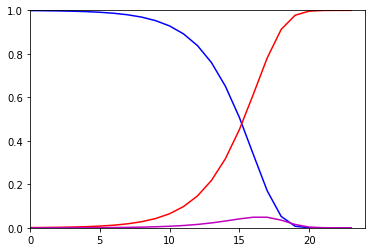

      dPlots    hPlots        wPlots  xPlots
0   0.001000  0.000000  9.990000e-01       0
1   0.001440  0.000160  9.984003e-01       1
2   0.002202  0.000245  9.975532e-01       2
3   0.003368  0.000374  9.962581e-01       3
4   0.005150  0.000571  9.942787e-01       4
5   0.007872  0.000873  9.912555e-01       5
6   0.012026  0.001331  9.866423e-01       6
7   0.018359  0.002028  9.796125e-01       7
8   0.027993  0.003083  9.689236e-01       8
9   0.042604  0.004670  9.527257e-01       9
10  0.064657  0.007036  9.283071e-01      10
11  0.097693  0.010511  8.917959e-01      11
12  0.146599  0.015493  8.379078e-01      12
13  0.217626  0.022354  7.600198e-01      13
14  0.317588  0.031149  6.512625e-01      14
15  0.451008  0.040945  5.080462e-01      15
16  0.613430  0.048679  3.378918e-01      16
17  0.781461  0.048465  1.700741e-01      17
18  0.912393  0.035284  5.232324e-02      18
19  0.977627  0.015353  7.020047e-03      19
20  0.996290  0.003409  3.009343e-04      20
21  0.9995

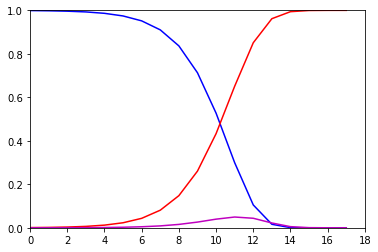

      dPlots    hPlots        wPlots  xPlots
0   0.001000  0.000000  9.990000e-01       0
1   0.001799  0.000200  9.980010e-01       1
2   0.003415  0.000379  9.962054e-01       2
3   0.006479  0.000718  9.928029e-01       3
4   0.012271  0.001358  9.863710e-01       4
5   0.023176  0.002556  9.742679e-01       5
6   0.043539  0.004771  9.516902e-01       6
7   0.080976  0.008763  9.102606e-01       7
8   0.147815  0.015614  8.365703e-01       8
9   0.260746  0.026281  7.129733e-01       9
10  0.432984  0.039775  5.272411e-01      10
11  0.651095  0.049556  2.993495e-01      11
12  0.851128  0.043814  1.050586e-01      12
13  0.961711  0.022169  1.612022e-02      13
14  0.993967  0.005293  7.400981e-04      14
15  0.999314  0.000675  1.146881e-05      15
16  0.999930  0.000070  1.217858e-07      16
17  0.999993  0.000007  1.225520e-09      17
2.0305431848689306


In [5]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#graphing functions
def plot_2D(graphInfo, title="Generation plot"):
    fig=plt.figure()
    plt.plot(graphInfo["xPlots"],graphInfo["wPlots"],'b-')
    plt.plot(graphInfo["xPlots"],graphInfo["dPlots"],'r-')
    plt.plot(graphInfo["xPlots"],graphInfo["hPlots"],'m-')
    plt.axis([0,len(graphInfo["xPlots"]),0,1])
    plt.show()
def model3D(X,Y,Z,xLabel,yLabel, title):
    #3D graph
    import matplotlib.pyplot as plt
    from matplotlib import cm
    min=1000
    max=-1000
    for rIndex in range(len(Z)):
        for cIndex in range(len(Z[rIndex])):
            if Z[rIndex][cIndex]<min:
                min=Z[rIndex][cIndex]
            if Z[rIndex][cIndex]>max:
                max=Z[rIndex][cIndex]
    if min<-max:
        max=-min
    else:
        min=-max
    
    #label axes
    plt.xlabel(xLabel, fontdict=None, labelpad=None)
    plt.ylabel(yLabel, fontdict=None, labelpad=None)
    plt.title(title)

    
    plt.axis(aspect='image');
    plt.imshow(Z, origin='lower', extent=([0, 1, 0, 1]), vmax=max, vmin=min, cmap=cm.coolwarm)
    plt.show()
#model functions
def update_vars(oldDataDict, newDataDict):
    for key in newDataDict.keys():
        oldDataDict[key]=newDataDict[key]
    return oldDataDict
def run_generation(simData):
    #load variables
    d=simData['d']
    qW=simData['qW']
    qD=simData['qD']
    qH=simData['qH']
    fW=simData['fW']
    fD=simData['fD']
    e=simData['e']
    #manuscript equations
    #variables to prevent redundant multiplication
    w2=(qW*fW)**2
    wd=qW*fW*qD*fD
    wh=qW*fW*qH*(1-(1-fD)*d)
    d2=(qD*fD)**2
    dh=qD*fD*qH*(1-(1-fD)*d)
    h2=(qH*(1-(1-fD)*d))**2
    
    #expected total frquency after loss from fitness
    #xBar=(1-qW*sW-qD*sD-qH*sD*d)**2
    fBar=(qW*fW+qD*fD+qH*(1-(1-fD)*d))**2

    qWP=(w2+wh+.25*h2)/fBar
    qDP=(e*(2*wd+wh+dh+.5*h2)+d2+dh+.25*h2)/fBar
    qHP=((1-e)*(2*wd+wh+dh+.5*h2))/fBar
    
    #catch float multiplication rounding errors
    total=qWP+qDP+qHP
    if total!=1:
        qWP/=total
        qDP/=total
        qHP/=total
    return {'qW':qWP,'qD':qDP,'qH':qHP}

def run_simulation(simData,graph=False,debug=False):
    graphInfo={"xPlots": [0], "wPlots": [simData['qW']], "dPlots": [simData['qD']], "hPlots": [simData['qH']]}
    for i in range(1,simData['generations']+1):
        update_vars(simData,run_generation(simData))
        graphInfo['xPlots'].append(i)
        graphInfo['wPlots'].append(simData['qW'])
        graphInfo['dPlots'].append(simData['qD'])
        graphInfo['hPlots'].append(simData['qH'])
        if simData['qW']>.99999:
            if graph:
                plot_2D(graphInfo)
            if debug:
                print(pd.DataFrame(graphInfo))
            return -(i**(1/4))
        elif simData['qD']>.99999:
            if graph:
                plot_2D(graphInfo)
            if debug:
                print(pd.DataFrame(graphInfo))
            return i**(1/4)
    if graph:
        plot_2D(graphInfo)
    if debug:
        print(pd.DataFrame(graphInfo))
    return 0


simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'e':.9,'d':.5,'generations':1000}

print(run_simulation(simData,True,True))

simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':1,'e':.9,'d':.5,'generations':1000}

print(run_simulation(simData,True,True))

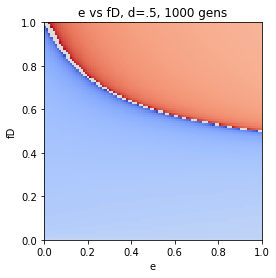

In [4]:
xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    for yIndex in range(len(yVals)):
        #y is f
        simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':yVals[yIndex],'e':xVals[xIndex],'d':.5,'generations':1000}
        takeover=run_simulation(simData)
        Z[yIndex,xIndex]=takeover
model3D(X,Y,Z,'e','fD','e vs fD, d=.5, 1000 gens')
